After coming across the numbers of convictions and executions in later 18th century England, I noticed that the percentage of those convicted each year seemed to decrease with each decade. Although the total number of executions (expressed below by line thickness) fluctuated, the percentage continuously decreased. I think this is due to Englanders growing distate of the practice.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
decade = ('1749-58', '1759-68', '1769-78', '1779-88', '1789-98', '1799-1808')
convictions = (527, 372, 787, 1152, 770, 804)
executions = (365, 206, 357, 531, 191, 126)

In [3]:
df = pd.DataFrame({'Convictions' : convictions, 'Executions' : executions}, index=decade)

In [5]:
df['Percentage'] = round((df['Executions'] / df['Convictions']) * 100,1)

In [16]:
df

,Convictions,Executions,Percentage
1749-58,527,365,69.3
1759-68,372,206,55.4
1769-78,787,357,45.4
1779-88,1152,531,46.1
1789-98,770,191,24.8
1799-1808,804,126,15.7


In [11]:
x = np.array(range(6))
y = df['Percentage']
widths2 = df['Executions'].values / 100

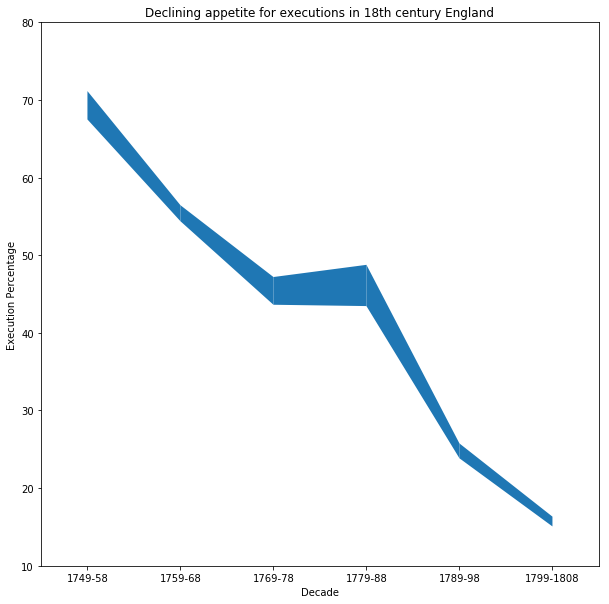

In [37]:
import matplotlib.patches as patch

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_xlim(-.5,5.5)
ax.set_ylim(10,80)

new_w = np.array(widths2) # <<< change according to your needs
# FIXME: this should probably be done using some sort of affine
#        transformation already build-in in matplotlib, but I don't know how

for i in range(len(x)-1):
    c = [[x[i], y[i]+new_w[i]/2.],
         [x[i+1], y[i+1]+new_w[i+1]/2.],
         [x[i+1], y[i+1]-new_w[i+1]/2.],
         [x[i], y[i]-new_w[i]/2.]
        ]
    p = patch.Polygon(c)
    ax.add_patch(p)
plt.xlabel("Decade")
plt.ylabel("Execution Percentage")
plt.title("Declining appetite for executions in 18th century England")
plt.xticks(x, decade)
plt.show()